# Select the stock tickers to analyze 

The [get_all tickers](https://https://github.com/shilewenuw/get_all_tickers) python library allows us to get all tickers from NYSE, NASDAQ and Amex. 

This list can also be filtered by market caps, and save list to a CSV.

In [1]:
from get_all_tickers import get_tickers as gt

In [2]:
# get tickers of 5 largest companies by market cap 
top_10 = gt.get_biggest_n_tickers(10)
print(top_10)

['AAPL', 'MSFT', 'AMZN', 'GOOG', 'GOOGL', 'BABA', 'FB', 'V', 'TSM', 'TV']


In [3]:
# filter by marketcap for small cap stocks between 200 million and 2 billion dollars
small_cap = gt.get_tickers_filtered(mktcap_min=200, mktcap_max=2000)

# Check the amount of tickers
print("The amount of small cap stocks chosen to observe: " + str(len(small_cap)))

The amount of small cap stocks chosen to observe: 2086


In [4]:
# get tickers for large cap stocks with market cap greater than 150billion dollars
large_cap = gt.get_tickers_filtered(mktcap_min=150e3)
# Check the amount of tickers
print("The amount of large cap stocks chosen to observe: " + str(len(large_cap)))

The amount of large cap stocks chosen to observe: 48


In [5]:
# print first twenty stock tickers
print(small_cap[:20])

['DDD', 'EGHT', 'ATEN', 'AIR', 'ANF', 'AWP', 'AOD', 'AKR', 'ACEL', 'ACCO', 'ADX', 'PEO', 'AGRO', 'ADNT', 'ATGE', 'ASIX', 'AVK', 'ALG', 'AIN', 'ALEX']


In [6]:
print(large_cap)

['ABT', 'ABBV', 'BABA', 'T', 'BAC', 'KO', 'TV', 'HD', 'JPM', 'JNJ', 'MA', 'MCD', 'MRK', 'NKE', 'NVS', 'NVO', 'ORCL', 'PFE', 'PG', 'CRM', 'SAP', 'TSM', 'TMO', 'TM', 'UN', 'UL', 'UNH', 'VZ', 'V', 'WMT', 'DIS', 'ADBE', 'GOOG', 'GOOGL', 'AMZN', 'AAPL', 'ASML', 'CSCO', 'CMCSA', 'COST', 'FB', 'INTC', 'MSFT', 'NFLX', 'NVDA', 'PYPL', 'PEP', 'TSLA']


In [7]:
type(large_cap)

list

# Save list to csv file

In [8]:
# to save to csv file
import pandas as pd


In [9]:
top_10_df = pd.DataFrame(top_10)
top_10_df.to_csv(r"C:\Users\ijeke\Documents\Algo Trading\Stocklist\top_10_df.csv")

In [10]:
small_cap_df = pd.DataFrame(small_cap)
small_cap_df.to_csv(r"C:\Users\ijeke\Documents\Algo Trading\Stocklist\small_cap_df.csv")

In [11]:
large_cap_df = pd.DataFrame(large_cap)
large_cap_df.to_csv(r"C:\Users\ijeke\Documents\Algo Trading\Stocklist\large_cap_df.csv")

# Download data for the stock

The pandas_datareader library provides us with a python function to extract stock data from yahoo.

In [12]:
# to load and process the data
from pandas_datareader import data
import numpy as np
import pandas as pd
from datetime import datetime 
from datetime import date, timedelta

In [13]:
# create time frame of 150 calendar days from today
days = timedelta(90)

start = date.today() - days 
today = date.today()

print('Current Date: ', today)
print(days)
print('Start Date: ', start)
print('\n')

Current Date:  2020-09-25
90 days, 0:00:00
Start Date:  2020-06-27




# Select Stock List

In [14]:
# create variable for selected list
symbols = top_10

# load data from yahoo
stock_data = data.DataReader(symbols, start=start, end=today,
                       data_source='yahoo')
stock_data.tail()

Attributes   Adj Close                                                     \
Symbols           AAPL        MSFT         AMZN         GOOG        GOOGL   
Date                                                                        
2020-09-21  110.080002  202.539993  2960.469971  1431.160034  1430.140015   
2020-09-22  111.809998  207.419998  3128.989990  1465.459961  1459.819946   
2020-09-23  107.120003  200.589996  2999.860107  1415.209961  1409.390015   
2020-09-24  108.220001  203.190002  3019.790039  1428.290039  1422.859985   
2020-09-25  112.279999  207.820007  3095.129883  1444.959961  1439.060059   

Attributes                                                       ...  \
Symbols           BABA          FB           V        TSM    TV  ...   
Date                                                             ...   
2020-09-21  273.820007  248.149994  197.449997  80.589996  6.19  ...   
2020-09-22  275.290009  254.750000  200.559998  80.480003  6.23  ...   
2020-09-23  272.950012  249.020004  195.369995  77.919998  6.16  ...   
2020-09-24  269.730011  249.529999  195.520004  78.379997  6.20  ...   
2020-09-25  271.089996  254.820007  197.250000  78.879997  6.07  ...   

Attributes       Volume                                               \
Symbols            AAPL        MSFT       AMZN       GOOG      GOOGL   
Date                                                                   
2020-09-21  195713800.0  39839700.0  6117900.0  2888800.0  2845400.0   
2020-09-22  183055400.0  33517100.0  6948800.0  1583200.0  1697500.0   
2020-09-23  150718700.0  30803800.0  5652700.0  1657400.0  1886300.0   
2020-09-24  166602400.0  31151500.0  5512600.0  1449500.0  1725700.0   
2020-09-25  145275191.0  27535693.0  4615202.0  1323375.0  1343466.0   

Attributes                                                          
Symbols          BABA          FB          V        TSM         TV  
Date                                                                
2020-09-21  9076400.0  24709400.0  9656000.0  8417100.0   859000.0  
2020-09-22  9673300.0  30293100.0  7543100.0  6375200.0  1017900.0  
2020-09-23  7353200.0  19641300.0  6310600.0  9094700.0  2544300.0  
2020-09-24  9550400.0  19975000.0  9861900.0  9935200.0  1105400.0  
2020-09-25  9454702.0  17520744.0  5136520.0  6018427.0  2226698.0  

[5 rows x 60 columns]

In [15]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 2020-06-29 to 2020-09-25
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, AAPL)   63 non-null     float64
 1   (Adj Close, MSFT)   63 non-null     float64
 2   (Adj Close, AMZN)   63 non-null     float64
 3   (Adj Close, GOOG)   63 non-null     float64
 4   (Adj Close, GOOGL)  63 non-null     float64
 5   (Adj Close, BABA)   63 non-null     float64
 6   (Adj Close, FB)     63 non-null     float64
 7   (Adj Close, V)      63 non-null     float64
 8   (Adj Close, TSM)    63 non-null     float64
 9   (Adj Close, TV)     63 non-null     float64
 10  (Close, AAPL)       63 non-null     float64
 11  (Close, MSFT)       63 non-null     float64
 12  (Close, AMZN)       63 non-null     float64
 13  (Close, GOOG)       63 non-null     float64
 14  (Close, GOOGL)      63 non-null     float64
 15  (Close, BABA)       63 non-null     flo

# Visualize returns on the Selected Stocks

In [30]:
# visualize all the selected stocks to see returns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# get data for only Adj Close
stock_data.iloc[:, stock_data.columns.get_level_values('Attributes') == 'Adj Close'].tail()


Attributes   Adj Close                                                     \
Symbols           AAPL        MSFT         AMZN         GOOG        GOOGL   
Date                                                                        
2020-09-21  110.080002  202.539993  2960.469971  1431.160034  1430.140015   
2020-09-22  111.809998  207.419998  3128.989990  1465.459961  1459.819946   
2020-09-23  107.120003  200.589996  2999.860107  1415.209961  1409.390015   
2020-09-24  108.220001  203.190002  3019.790039  1428.290039  1422.859985   
2020-09-25  112.279999  207.820007  3095.129883  1444.959961  1439.060059   

Attributes                                                       
Symbols           BABA          FB           V        TSM    TV  
Date                                                             
2020-09-21  273.820007  248.149994  197.449997  80.589996  6.19  
2020-09-22  275.290009  254.750000  200.559998  80.480003  6.23  
2020-09-23  272.950012  249.020004  195.369995  77.919998  6.16  
2020-09-24  269.730011  249.529999  195.520004  78.379997  6.20  
2020-09-25  271.089996  254.820007  197.250000  78.879997  6.07

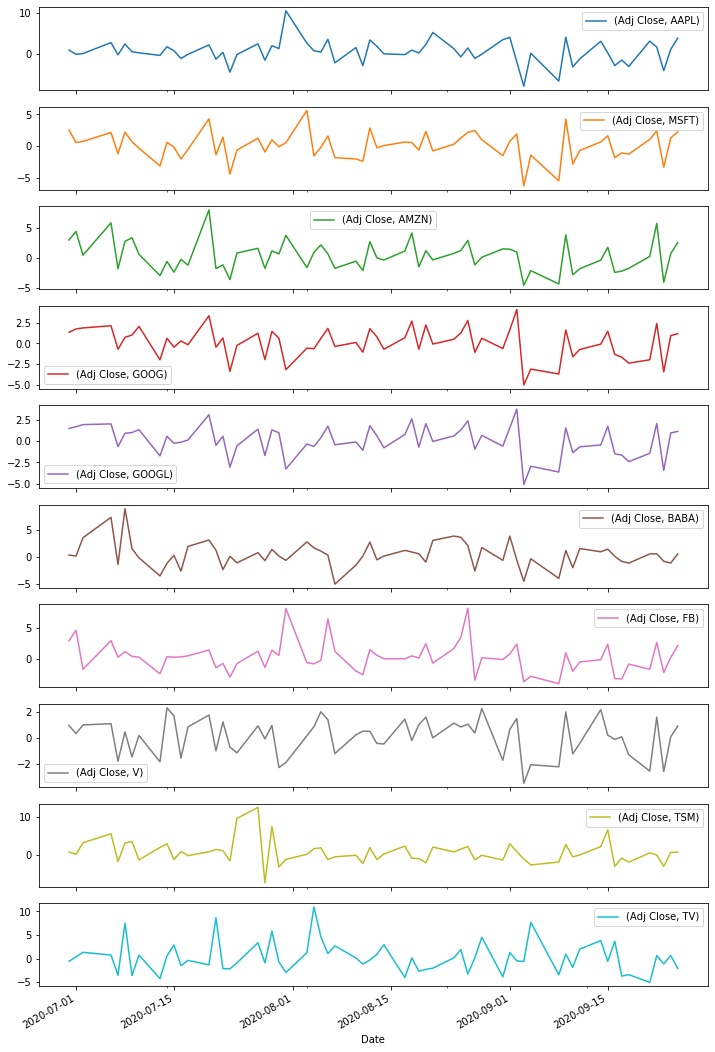

In [18]:
# show returns using Adj Close for all the selected stocks
stock_data_return = stock_data.iloc[:, stock_data.columns.get_level_values('Attributes') == 'Adj Close'].pct_change().mul(100)

stock_data_return.plot(subplots=True, figsize=[12,20])

plt.show()

In [19]:
stock_data = stock_data.stack()

stock_data.tail()

Attributes           Adj Close       Close        High         Low  \
Date       Symbols                                                   
2020-09-25 BABA     271.089996  271.089996  271.809998  264.559998   
           FB       254.820007  254.820007  255.750000  246.610001   
           V        197.250000  197.250000  198.139999  193.509995   
           TSM       78.879997   78.879997   78.919998   77.389999   
           TV         6.070000    6.070000    6.190000    5.995000   

Attributes                Open      Volume  
Date       Symbols                          
2020-09-25 BABA     267.570007   9454702.0  
           FB       249.399994  17520744.0  
           V        195.020004   5136520.0  
           TSM       78.169998   6018427.0  
           TV         6.180000   2226698.0

In [20]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 630 entries, (Timestamp('2020-06-29 00:00:00'), 'AAPL') to (Timestamp('2020-09-25 00:00:00'), 'TV')
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  630 non-null    float64
 1   Close      630 non-null    float64
 2   High       630 non-null    float64
 3   Low        630 non-null    float64
 4   Open       630 non-null    float64
 5   Volume     630 non-null    float64
dtypes: float64(6)
memory usage: 31.4+ KB


# Select a stock

In [21]:
# assign variable for selected stock
selected_stock = 'BABA'

# get data from second level index by stock ticker
#stock = stock_data[stock_data.index.get_level_values('Symbols') == stock].reset_index(level=1, drop=True)
stock = stock_data[stock_data.index.get_level_values('Symbols') == selected_stock].reset_index(level=1)

In [22]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 2020-06-29 to 2020-09-25
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symbols    63 non-null     object 
 1   Adj Close  63 non-null     float64
 2   Close      63 non-null     float64
 3   High       63 non-null     float64
 4   Low        63 non-null     float64
 5   Open       63 non-null     float64
 6   Volume     63 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.9+ KB


# Visualize the data using different price-momentum indicators

In [23]:
# import libraries to visualize the data
import matplotlib.pyplot as plt
%matplotlib inline
import mplfinance as mpf
mpf.__version__

'0.12.7a0'

All the charts assume 10, 20 or 50 days for moving average. 

## Price vs Moving Average

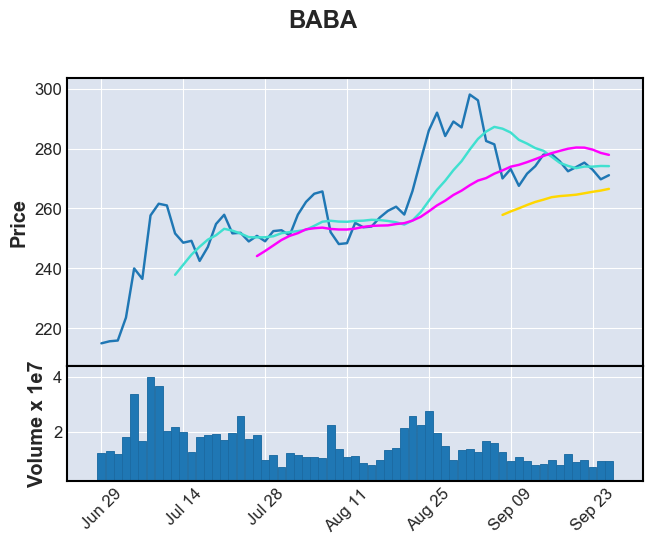

In [24]:
# show price versus moving average 

mpf.plot(stock, type='line', mav=(10,20,50), volume=True, title = selected_stock)

## Renko Price Chart

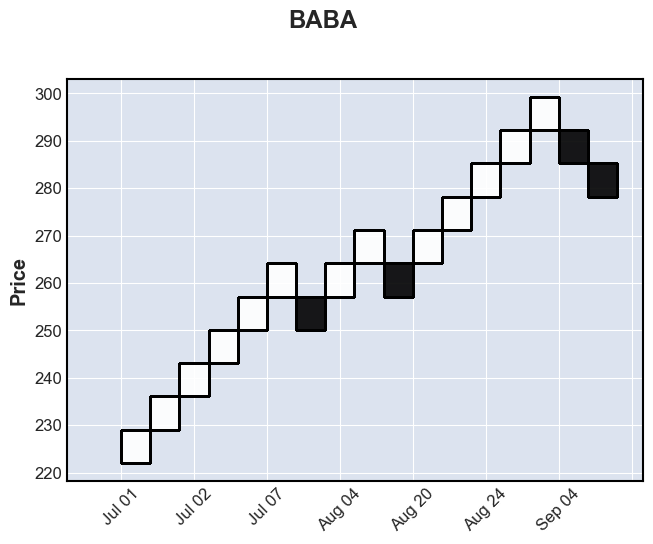

In [25]:
# visualize using renko indicator

mpf.plot(stock, type='renko', renko_params=dict(brick_size='atr', atr_length=14), title = selected_stock, style='default')

## PNF Chart

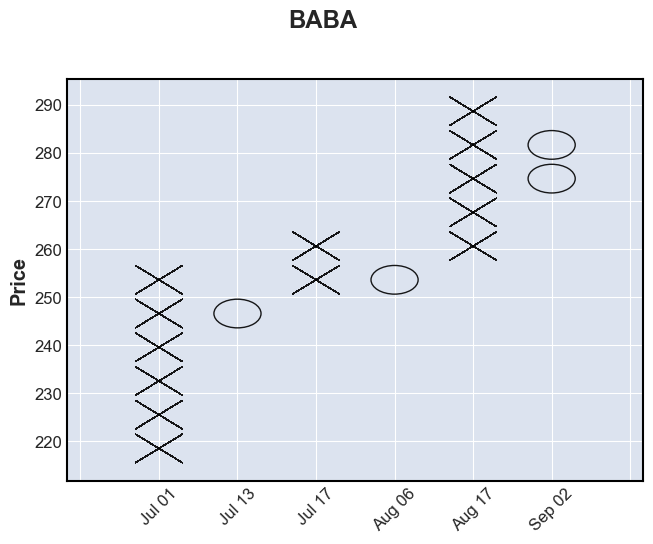

In [26]:
# visualize using renko indicator

mpf.plot(stock, type='pnf', title = selected_stock)

## Candlestick indicators with Volume

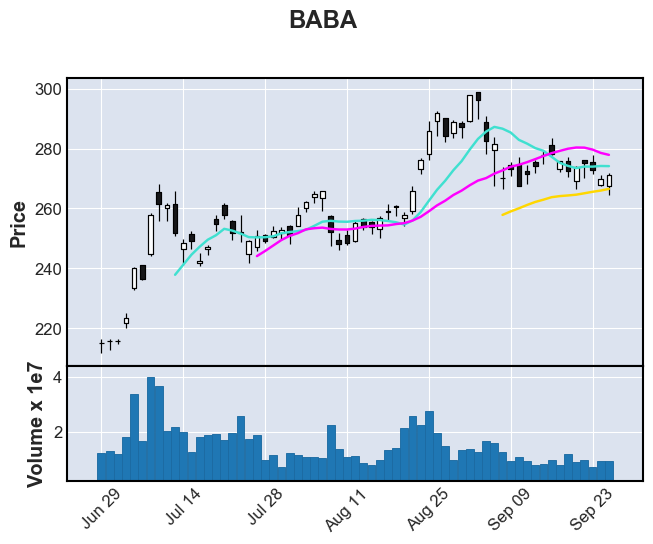

In [27]:
# visualize candlestick and also volume

mpf.plot(stock, type='candle', mav=(10, 20, 50), volume=True, title = selected_stock)

## OHLC indicator with volume

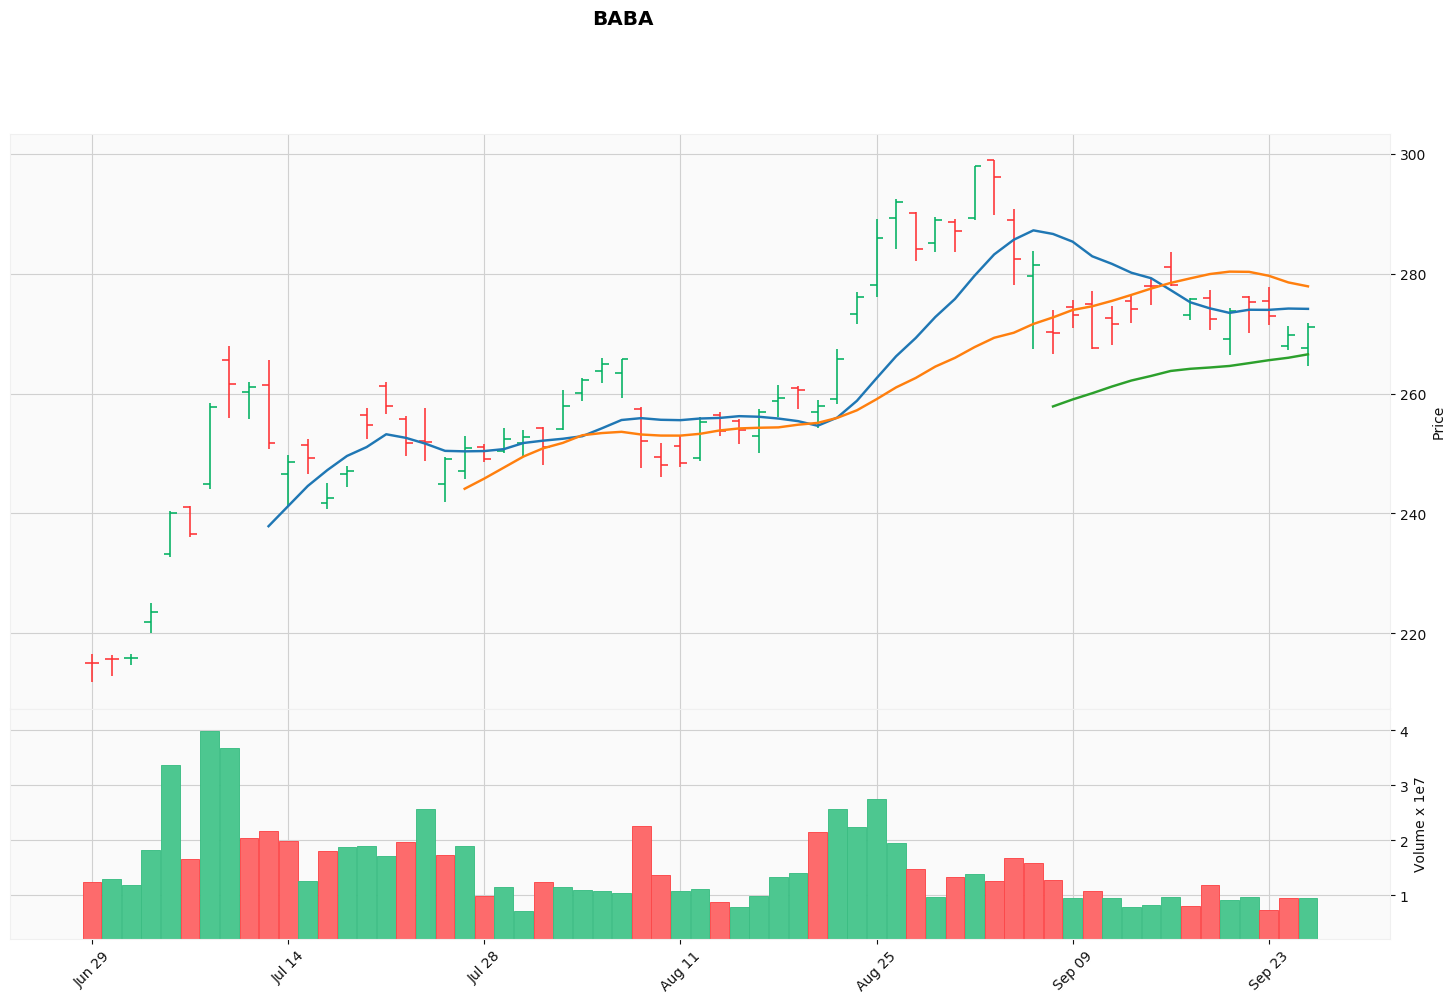

In [28]:
# add figratio and figscale parameters to change the size of the chart, and the color of the bars 
mpf.plot(stock, type='ohlc',mav=(10,20,50), volume=True,figratio=(20,12),figscale=2, style='yahoo', title= selected_stock)

## OHLC indicator with Candlestick

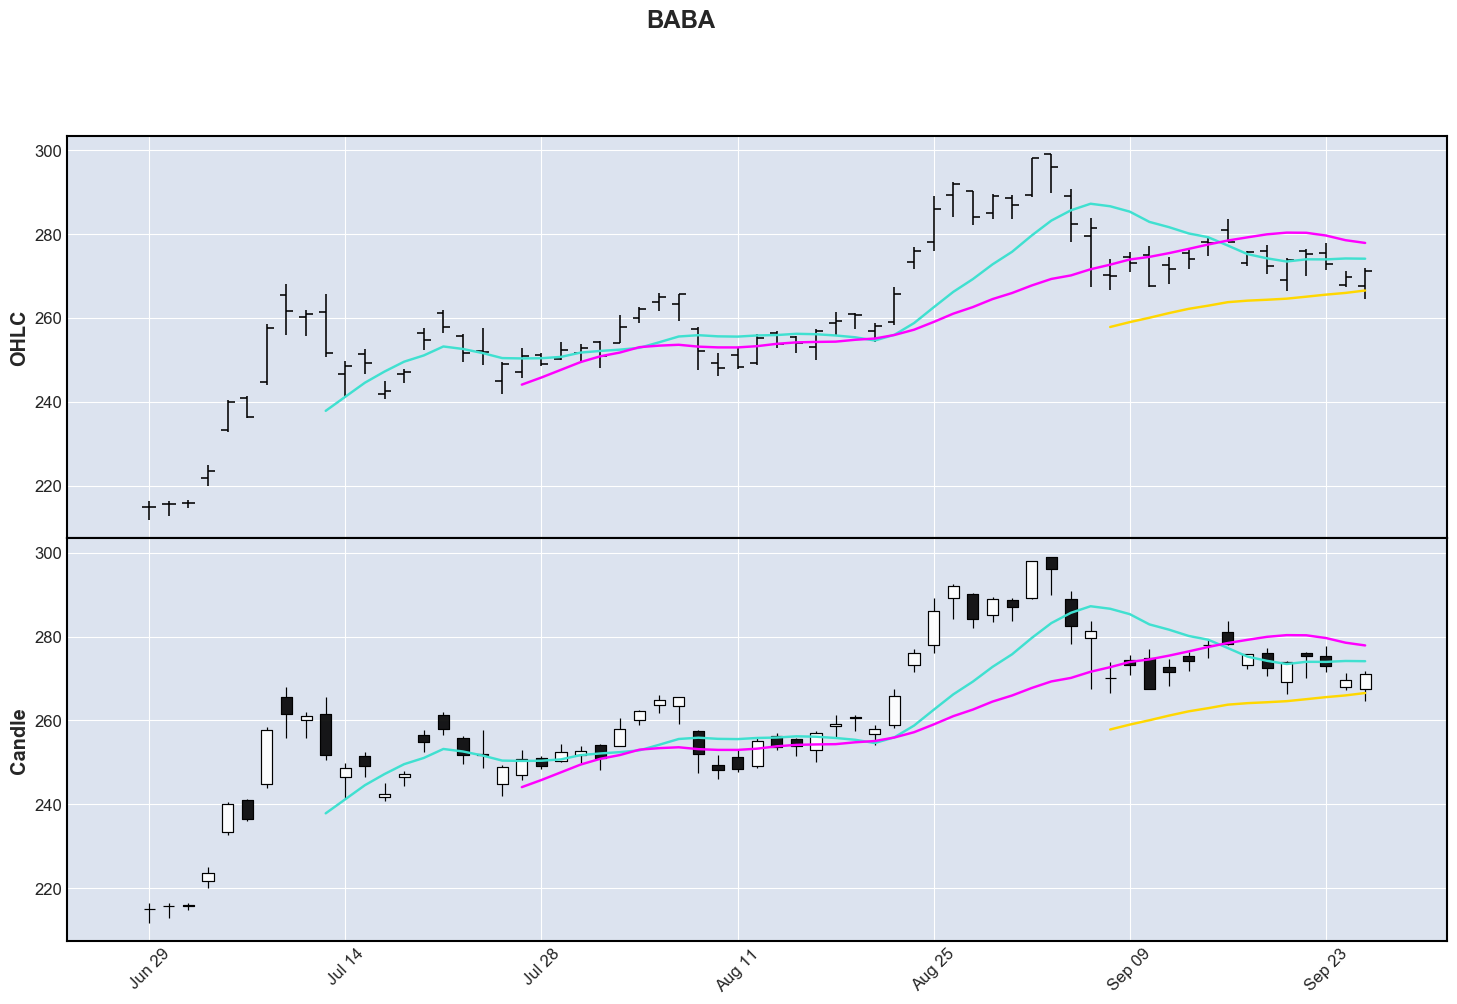

In [29]:
# show both price movements with OHLC and Candlestick using 
ap = mpf.make_addplot(stock,panel=1,type='candle',ylabel='Candle',mav=(10,20,50))
mpf.plot(stock,mav=(10,20,50),ylabel='OHLC',addplot=ap,panel_ratios=(1,1),figratio=(20,12),figscale=2, title = selected_stock)